# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 16 - Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [2]:
ins = pd.read_csv("Insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
ins_sex = ins.sex
ins_smoker = ins.smoker
ins_region = ins.region

In [4]:
ins.sex = ins_sex
print(ins.groupby(by='sex').count().age)
#print(ins.sex.head())
le = LabelEncoder()
le.fit(ins.sex)
print(le.classes_)
ins.sex = le.transform(ins.sex)
#print(ins.sex.head())

sex
female    662
male      676
Name: age, dtype: int64
['female' 'male']


In [5]:
ins.smoker = ins_smoker
print(ins.groupby(by='smoker').count().age)
#print(ins.smoker.head())
le.fit(ins.smoker)
print(le.classes_)
ins.smoker = le.transform(ins.smoker)
#print(ins.smoker.head())

smoker
no     1064
yes     274
Name: age, dtype: int64
['no' 'yes']


In [6]:
ins.region = ins_region
print(ins.groupby(by='region').count().age)
#print(ins.region.head())
le.fit(ins.region)
print(le.classes_)
ins.region = le.transform(ins.region)
#print(ins.region.head())

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: age, dtype: int64
['northeast' 'northwest' 'southeast' 'southwest']


In [7]:
ins.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
ins[~ins.applymap(np.isreal).all(1)]

,age,sex,bmi,children,smoker,region,charges


# Question 17 - Check the distribution of expenses(charges) and state your insights.

In [9]:
import scipy.stats as s
tstat,pval = s.shapiro(ins.charges)
#print(ins.charges)

tstat,cval,alpha = s.anderson(ins.charges, dist = 'norm')
print(tstat,cval[2],alpha[2])

85.12851936032212 0.785 5.0


Observation: The anderson function which tests a sample for the mentioned distribution type [we are testing for normal distribution here], returns a statistic value of 85.12 which is larger than the critical value of 0.785 for a significance level of 5%.

Hence we reject the null hypothesis that the expenses / charges feature is normally distributed.

# Question 18 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [10]:
ins.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


By applying the correlation function on the insurance dataframe, we can see that the correlation between all features and "charges" is low except the categorical variable "smoker". Below is the pairplot to visualize the relationship between the features with respect to "smoker".

# Question 19 - Visualize the relationship among various variables/features. 

You can use pairplot function and create a scatterplot matrix to do so.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


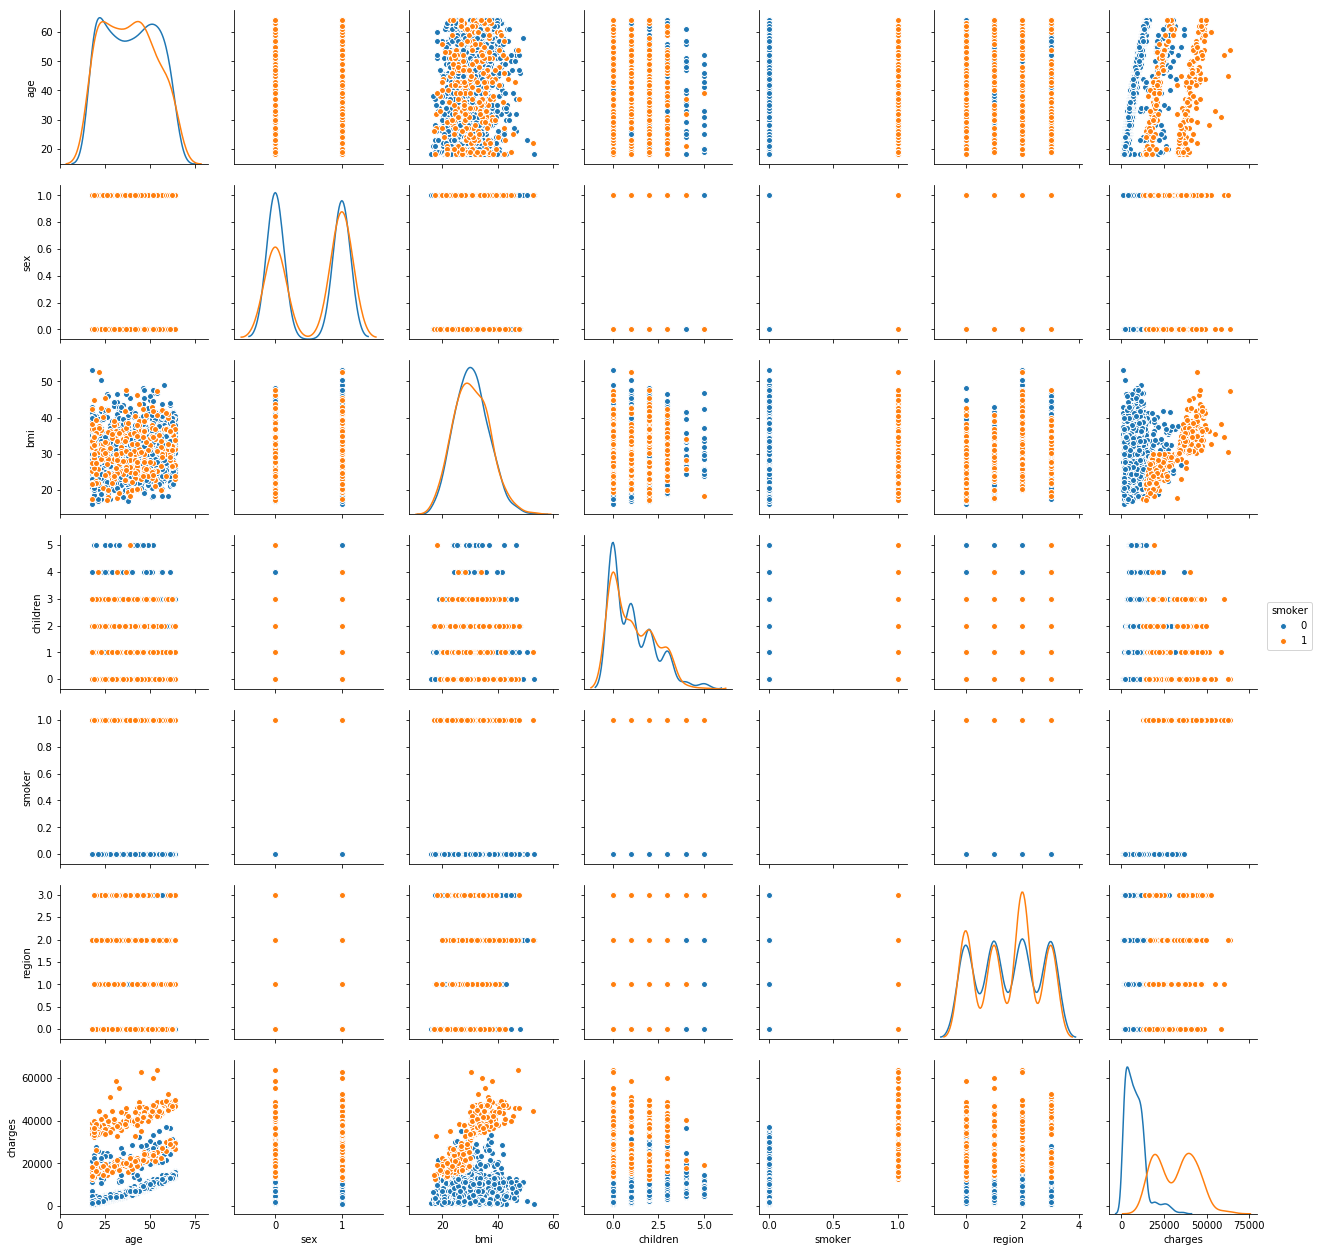

In [11]:
sns.pairplot(ins, hue = 'smoker', diag_kind = 'kde')

From the above pairplot matrix, we can see that the smokers have high insurance charges and the non-smokers have relatively lower charges.

In [12]:
#Before splitting the data, I am reverting the categorical values to original

#ins.sex = ins_sex
#ins.smoker = ins_smoker
#ins.region = ins_region

# Question 20 - Get the train and test data from your dataset.

In [13]:
X = ins.iloc[:,0:6]
Y = ins.iloc[:,6:7]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("Shapes:\nX:", X.shape, "\nY:", Y.shape, "\nX Train:", X_Train.shape, "\nY Train:", Y_Train.shape, "\nX Test:", X_Test.shape, "\nY Test:", Y_Test.shape)

Shapes:
X: (1338, 6) 
Y: (1338, 1) 
X Train: (936, 6) 
Y Train: (936, 1) 
X Test: (402, 6) 
Y Test: (402, 1)


In [14]:
LinReg_Model = LinearRegression()
LinReg_Model.fit(X_Train, Y_Train)
Y_Predict = LinReg_Model.predict(X_Test)
print("Accuracy of the Linear Regression Model before one hot encoding [Test]:", round(LinReg_Model.score(X_Test,Y_Test),5))
Y_Predict = LinReg_Model.predict(X_Train)
print("Accuracy of the Linear Regression Model before one hot encoding [Train]:", round(LinReg_Model.score(X_Train,Y_Train),5))

Accuracy of the Linear Regression Model before one hot encoding [Test]: 0.79111
Accuracy of the Linear Regression Model before one hot encoding [Train]: 0.73068


# Question 21 - Create the dummies for the categorical variables/features.

You can use pd.get_dummies() function to do so.

In [15]:
#Before splitting the data, I am reverting the categorical value to original

#ins.sex = ins_sex
#ins.smoker = ins_smoker
ins.region = ins_region

ins_dummy = pd.get_dummies(ins, columns = ['region'])
ins_dummy_charges = ins_dummy.charges
ins_dummy = ins_dummy.drop(columns='charges')
ins_dummy['charges'] = ins_dummy_charges
ins_dummy.head(3)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.90,0,1,0,0,0,1,16884.9240
1,18,1,33.77,1,0,0,0,1,0,1725.5523
2,28,1,33.00,3,0,0,0,1,0,4449.4620


In [16]:
ins_dummy.corr()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.002425,-0.011156,0.017117,-0.004184,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.138156,-0.135996,0.270025,-0.006205,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.022808,0.024806,-0.023066,0.021914,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.787251
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.006349
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.039905
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.073982
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,-0.043210
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006349,-0.039905,0.073982,-0.043210,1.000000


# Question 22 - Train your model.

In [17]:
X = ins_dummy.iloc[:,0:9]
Y = ins_dummy.iloc[:,9:10]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("Shapes:\nX:", X.shape, "\nY:", Y.shape, "\nX Train:", X_Train.shape, "\nY Train:", Y_Train.shape, "\nX Test:", X_Test.shape, "\nY Test:", Y_Test.shape)

Shapes:
X: (1338, 9) 
Y: (1338, 1) 
X Train: (936, 9) 
Y Train: (936, 1) 
X Test: (402, 9) 
Y Test: (402, 1)


# Question 23 - Fit your model and get the summary of model.

In [18]:
LinReg_Model = LinearRegression()
LinReg_Model.fit(X_Train, Y_Train)
print("Liner Regression Model Summary:\n\nY Intercept of the best fit line:\n", LinReg_Model.intercept_,"\n\nCoefficients of the best fit line:\n", LinReg_Model.coef_)

import statsmodels.api as sm
X_Const = sm.add_constant(X_Train.drop(['region_northeast','region_northwest','region_southeast','region_southwest'],axis=1))
LinReg_Model_Summary = sm.OLS(Y_Train,X_Const).fit()
print("\nParameters:\n",LinReg_Model_Summary.params)
print("Summary:\n",LinReg_Model_Summary.summary())

Liner Regression Model Summary:

Y Intercept of the best fit line:
 [-12424.33437342] 

Coefficients of the best fit line:
 [[  256.43544682   -47.54675517   335.36907276   472.70978916
  23435.99116948   589.02469054    27.12354518  -405.723989
   -210.42424672]]

Parameters:
 const      -12057.244846
age           257.800670
sex           -41.748257
bmi           321.060043
children      469.581134
smoker      23418.667191
dtype: float64
Summary:
                             OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     503.0
Date:                Tue, 22 Jan 2019   Prob (F-statistic):          1.68e-261
Time:                        23:41:03   Log-Likelihood:                -9496.9
No. Observations:                 936   AIC:                         1.9

In [19]:
# Alternate Method:

import statsmodels.formula.api as smf
data_train = pd.concat([X_Train, Y_Train], axis = 1)
#print(data_train.columns)
LinReg_Model_Summary = smf.ols(formula = 'charges ~ age+sex+bmi+children+smoker', data = data_train).fit()
print("Parameters:\n",LinReg_Model_Summary.params)
print("\nSummary:\n",LinReg_Model_Summary.summary())

Parameters:
 Intercept   -12057.244846
age            257.800670
sex            -41.748257
bmi            321.060043
children       469.581134
smoker       23418.667191
dtype: float64

Summary:
                             OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     503.0
Date:                Tue, 22 Jan 2019   Prob (F-statistic):          1.68e-261
Time:                        23:41:03   Log-Likelihood:                -9496.9
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     930   BIC:                         1.903e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
               

# Question 24 - Predict the charges and evaluate the model performance. ( 1 point)

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [20]:
Y_Predict = LinReg_Model.predict(X_Test)
print("Accuracy of the Linear Regression Model after one hot encoding: [Test]", round(LinReg_Model.score(X_Test,Y_Test),4))

import sklearn.metrics as met
print("Mean Absolute Error of the model:", round(met.mean_absolute_error(Y_Test,Y_Predict),2))
print("Mean Squared Error of the model:", round(met.mean_squared_error(Y_Test,Y_Predict),2))
print("Root Mean Squared Error of the model:", round(np.sqrt(met.mean_squared_error(Y_Test,Y_Predict)),2))

Y_Predict = LinReg_Model.predict(X_Train)
print("Accuracy of the Linear Regression Model after one hot encoding: [Train]", round(LinReg_Model.score(X_Train,Y_Train),4))

Accuracy of the Linear Regression Model after one hot encoding: [Test] 0.7909
Mean Absolute Error of the model: 4011.45
Mean Squared Error of the model: 33342497.83
Root Mean Squared Error of the model: 5774.3
Accuracy of the Linear Regression Model after one hot encoding: [Train] 0.731


# Question 25 - What are some ideas to improve your model performance? 

It is a subjective question, you are not expected to give code and output in this last question.
Just think of the ways which can be helpful in improving your model performance.

In [21]:
ins.cov()

,age,sex,bmi,children,smoker,charges
age,197.401387,-0.146559,9.362337,0.719303,-0.141903,5.087480e+04
sex,-0.146559,0.250160,0.141435,0.010348,0.015383,3.470145e+02
bmi,9.362337,0.141435,37.187884,0.093795,0.009233,1.464730e+04
children,0.719303,0.010348,0.093795,1.453213,0.003734,9.926742e+02
smoker,-0.141903,0.015383,0.009233,0.003734,0.162969,3.848667e+03
charges,50874.802298,347.014469,14647.304426,992.674197,3848.667032,1.466524e+08


By transforming the data set into z normalized values, accuracy of our model can be increased.

Since z score is calculated using mean and standard deviation, data leak could occur if the z score transformation is applied before splitting the data into train and test because the mean and standard deviation are central tendencies of the entire column. This means that the test data prediction will be compromised since we get a sneak peek into the test data through the z scores

But if the central tendencies of the train and test data are too far away, we get stuck in a conundrum and the z score preprocessing technique will be proved ineffective.

So, we check for the central tendencies of the train and test data sets. Since there is not much variation, we are proceeding with the z score transformation.

From the above step, we can see that the covariance of age, bmi and smoker to charges are higher. So we establish relationships among the 3 chosen features for better prediction.

While the z score transformation didnot have much effect on thhe accuracy score, the relationships built between the chosen features has improved the accuracy score from 0.79 to 0.86

In [22]:
from scipy.stats import zscore
X = ins.iloc[:,0:5]
Y = ins.iloc[:,6:7]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
X_Desc = pd.DataFrame()
X_Desc['Train_age'] = X_Train.age.describe()
X_Desc['Test_age'] = X_Test.age.describe()
X_Desc['Train_sex'] = X_Train.sex.describe()
X_Desc['Test_sex'] = X_Test.sex.describe()
X_Desc['Train_bmi'] = X_Train.bmi.describe()
X_Desc['Test_bmi'] = X_Test.bmi.describe()
X_Desc['Train_children'] = X_Train.children.describe()
X_Desc['Test_children'] = X_Test.children.describe()
X_Desc['Train_smoker'] = X_Train.smoker.describe()
X_Desc['Test_smoker'] = X_Test.smoker.describe()
X_Desc['Train_charges'] = Y_Train.charges.describe()
X_Desc['Test_charges'] = Y_Test.charges.describe()
X_Desc = X_Desc.drop(['count'])
print(X_Desc,'\n')
X_Train_Z = X_Train.apply(zscore)
Y_Train_Z = Y_Train.apply(zscore)
X_Test_Z = X_Test.apply(zscore)
Y_Test_Z = Y_Test.apply(zscore)
LinReg_Model = LinearRegression()
LinReg_Model.fit(X_Train_Z, Y_Train_Z)
test = round(LinReg_Model.score(X_Test_Z,Y_Test_Z),4)
train = round(LinReg_Model.score(X_Train_Z,Y_Train_Z),4)
Y_Predict = LinReg_Model.predict(X_Test_Z)
print("Before establishing relationships among Age, BMI and Smoker:\n")
print("Test Accuracy", test)
Y_Predict = LinReg_Model.predict(X_Train_Z)
print("Train Accuracy", train)
X_Train_Z['relation_bmi_smoke'] = X_Train_Z.bmi * X_Train_Z.smoker
X_Test_Z['relation_bmi_smoke'] = X_Test_Z.bmi * X_Test_Z.smoker
X_Train_Z['relation_bmi_age'] = X_Train_Z.bmi * X_Train_Z.age
X_Test_Z['relation_bmi_age'] = X_Test_Z.bmi * X_Test_Z.age
X_Train_Z['relation_age_smoke'] = X_Train_Z.age * X_Train_Z.smoker
X_Test_Z['relation_age_smoke'] = X_Test_Z.age * X_Test_Z.smoker
LinReg_Model.fit(X_Train_Z, Y_Train_Z)
test = round(LinReg_Model.score(X_Test_Z,Y_Test_Z),4)
train = round(LinReg_Model.score(X_Train_Z,Y_Train_Z),4)
Y_Predict = LinReg_Model.predict(X_Test_Z)
print("\nAfter establishing relationships among Age, BMI and Smoker:\n")
print("Test Accuracy", test)
Y_Predict = LinReg_Model.predict(X_Train_Z)
print("Train Accuracy", train)

      Train_age   Test_age  Train_sex  Test_sex  Train_bmi   Test_bmi  \
mean  39.471154  38.592040   0.488248  0.544776  30.752366  30.456244   
std   14.012570  14.135001   0.500129  0.498612   6.235587   5.767818   
min   18.000000  18.000000   0.000000  0.000000  15.960000  16.815000   
25%   27.000000  26.000000   0.000000  0.000000  26.400000  26.143750   
50%   40.000000  38.000000   0.000000  1.000000  30.305000  30.495000   
75%   52.000000  50.750000   1.000000  1.000000  34.800000  34.273750   
max   64.000000  64.000000   1.000000  1.000000  53.130000  46.530000   

      Train_children  Test_children  Train_smoker  Test_smoker  Train_charges  \
mean        1.081197       1.126866      0.202991     0.208955   13232.916467   
std         1.204195       1.209408      0.402441     0.407069   11880.110295   
min         0.000000       0.000000      0.000000     0.000000    1121.873900   
25%         0.000000       0.000000      0.000000     0.000000    4908.794762   
50%       